# What is the most optimal skill to learn for a Data Engineer?

#### Methodology
1. Continue from the last notebook to find the percent of postings with skill
2. Visualize median salary vs percent skill demand


## Import Libraries and Data

In [5]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Clean Data

Filter the original dataaset to only get rows where the job title is 'Data Engineer' and the country is 'Germany', to create a new DataFrame `df_DE_GR`. Drop NaN values from the `salary_year_avg` column. Then it uses the `explode` method on the `job_skills` column to create a new row in a new DataFrame (`df_DE_GR_exploded`) for each skill associated with a job.
Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` column.

In [6]:
df_DE_GR = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Germany')].copy()

df_DE_GR = df_DE_GR.dropna(subset=['salary_year_avg'])

df_DE_GR_exploded = df_DE_GR.explode('job_skills')

df_DE_GR_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
7772,199675.0,spark
45652,147500.0,sql
45652,147500.0,scala
45652,147500.0,spark
100515,89100.0,assembly


## Calculate Percent of Job Postings That Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Engineer jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [7]:
df_DE_skills = df_DE_GR_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DE_skills = df_DE_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DE_job_count = len(df_DE_GR)

df_DE_skills['skill_percent'] = df_DE_skills['skill_count'] / DE_job_count * 100

df_DE_skills = df_DE_skills[df_DE_skills['skill_count'] > 0]

df_DE_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,20,128587.5,51.282051
spark,19,147500.0,48.717949
sql,19,147500.0,48.717949
aws,10,143750.0,25.641026
azure,8,98301.5,20.512821
airflow,8,122891.5,20.512821
gcp,6,122891.5,15.384615
git,6,122472.0,15.384615
java,6,98283.0,15.384615


## Median Salary vs Percent Skill Demand

Filters for Data Engineer skills that exceed a certain percentage (skill_limit)

In [8]:
skill_limit = 5

df_DE_skills_high_demand = df_DE_skills[df_DE_skills['skill_percent'] > skill_limit]

Create a scatter plot to visualize the relationship between the percentage of Data Engineer jobs that require specific skills and the median salary for those skills

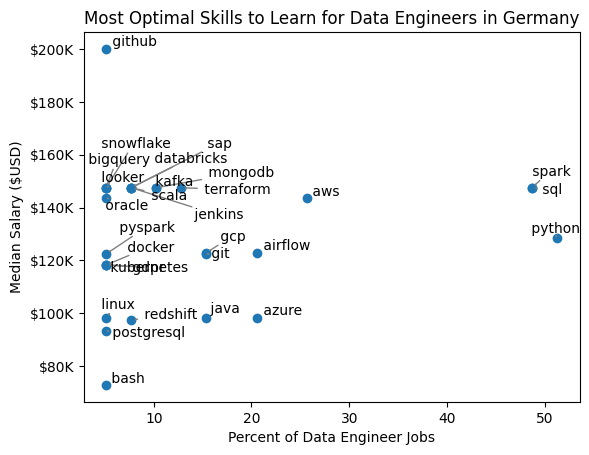

In [12]:
from adjustText import adjust_text


plt.scatter(df_DE_skills_high_demand['skill_percent'], df_DE_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Engineer Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills to Learn for Data Engineers in Germany')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Add labels to points and collect them in a list
texts = []
for i ,txt in enumerate(df_DE_skills_high_demand.index):
    texts.append(plt.text(df_DE_skills_high_demand['skill_percent'].iloc[i], df_DE_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


plt.show()